In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot


from scipy import stats

from sklearn.metrics import mean_squared_error


from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE


from sklearn.linear_model import LinearRegression

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('Likes.csv')
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


['age', 'tenure', 'friend_count', 'friendships_initiated', 'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']


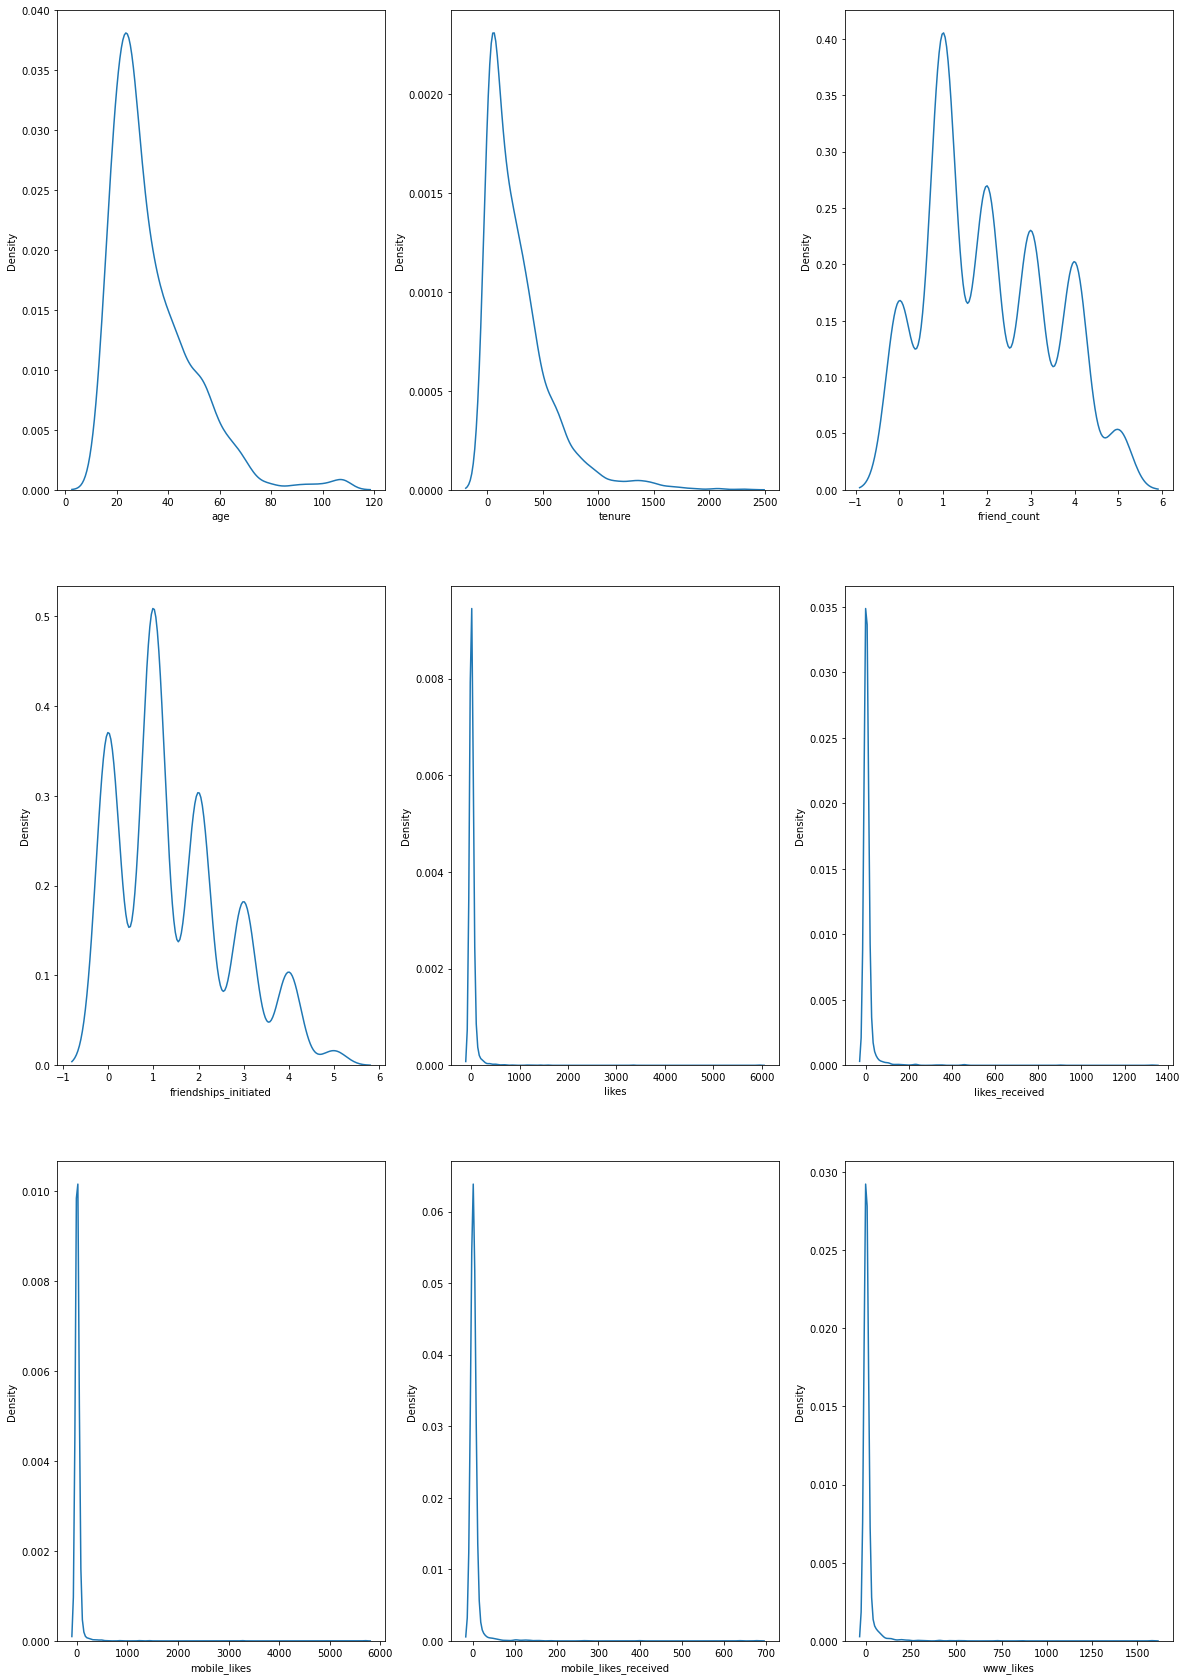

In [3]:
c1 = ['age', 'tenure', 'friend_count', 'friendships_initiated', 'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']

print(c1)
fig, ax = plt.subplots(nrows = 3, ncols= 3, figsize=(20, 30))

for i, subplot in zip(c1,  ax.flatten()):
    sns.kdeplot(df[i], ax=subplot)
plt.show()

The above plots are not normally distributed and all the likely are right skewed

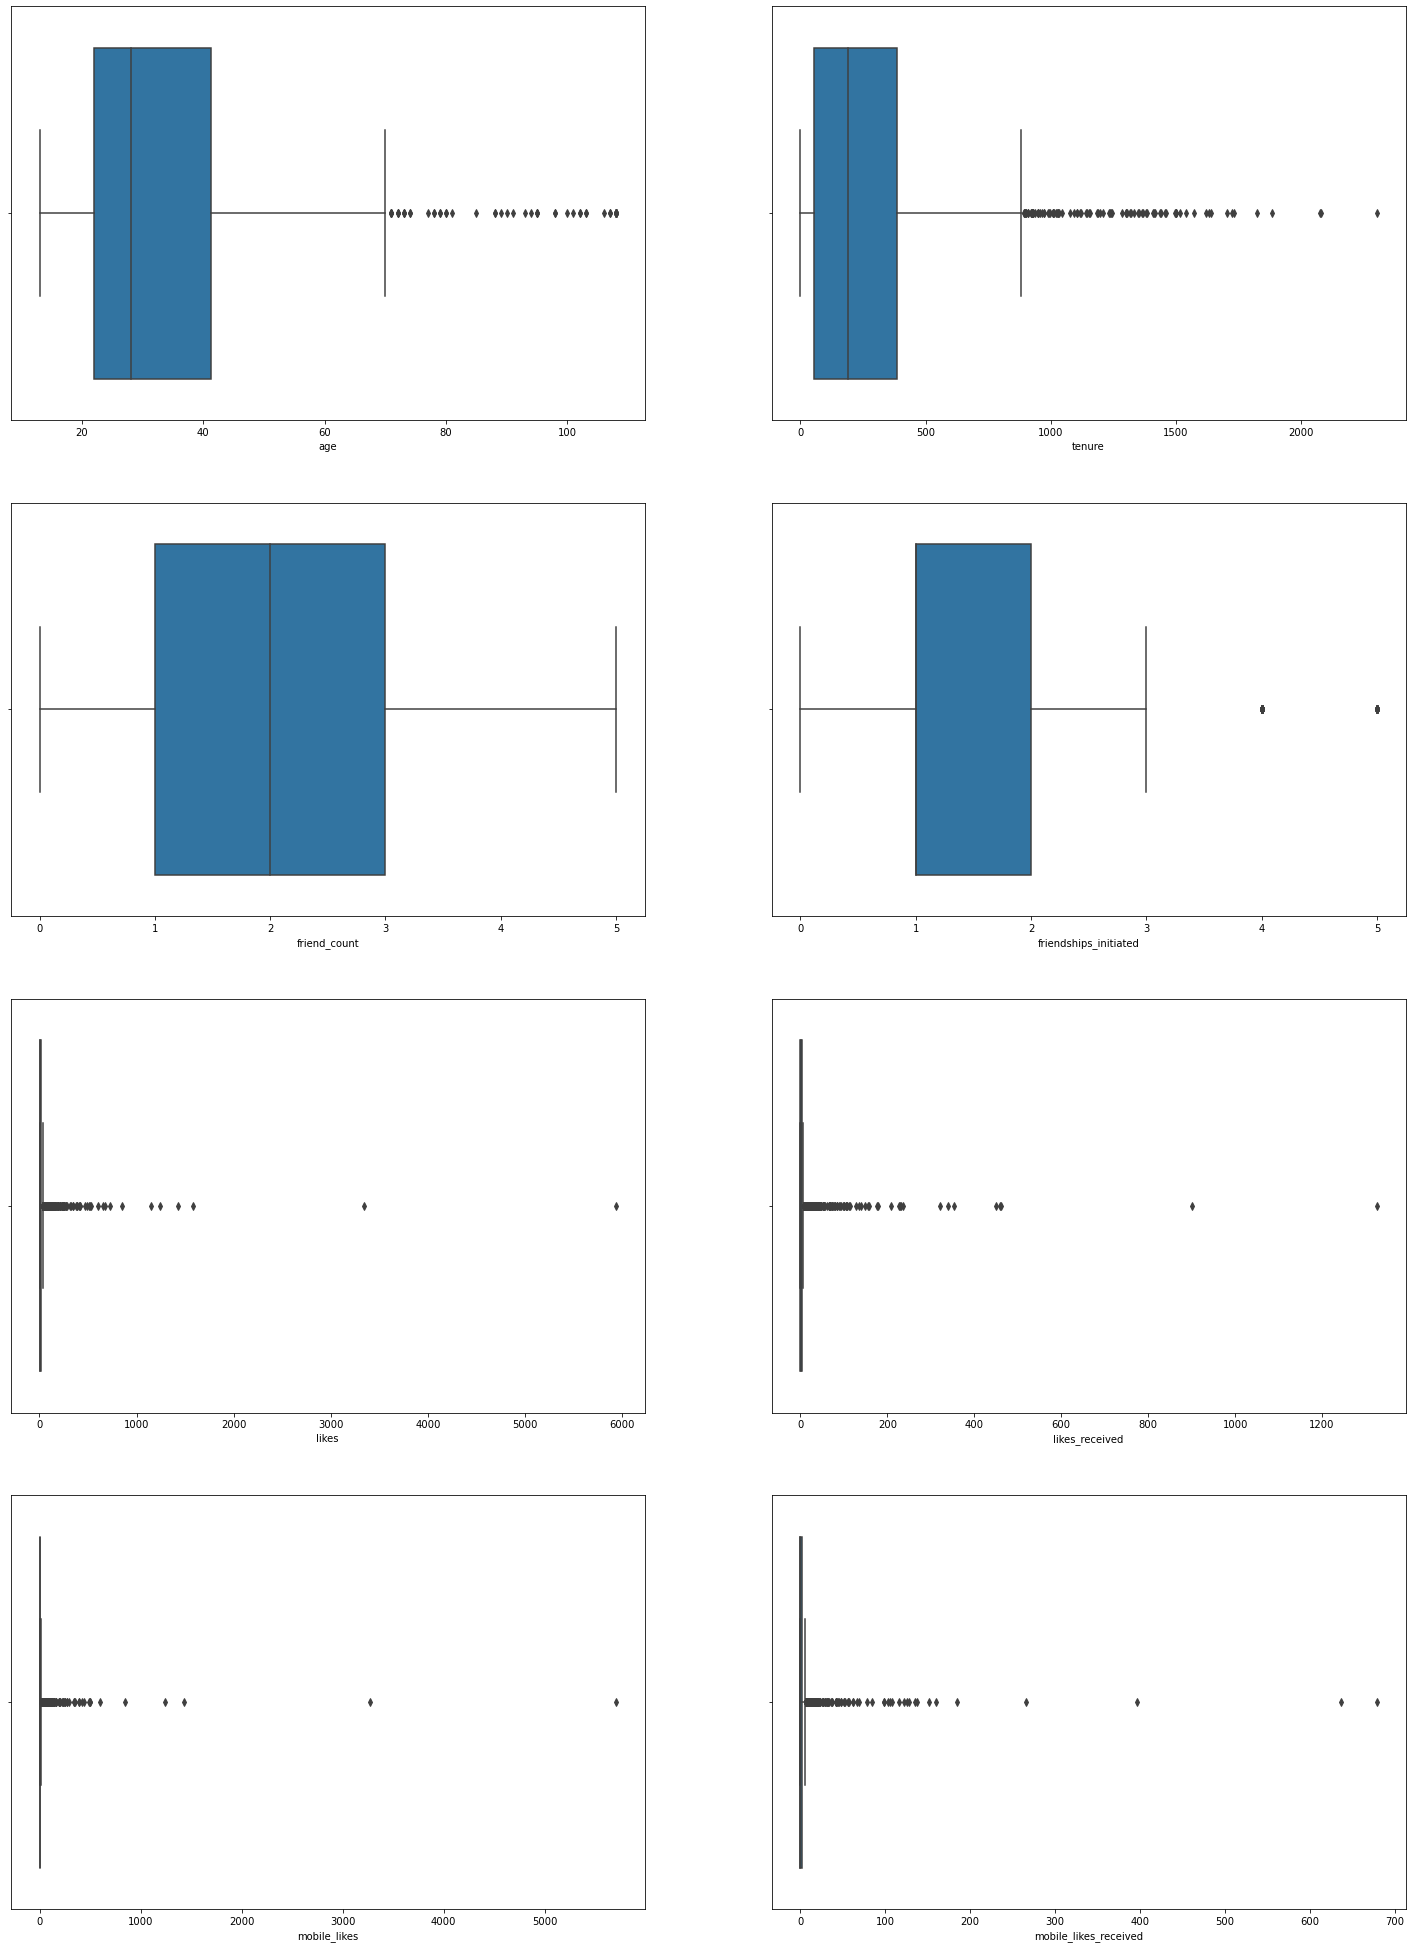

In [5]:
fig, ax = plt.subplots(nrows = 4, ncols= 2, figsize=(25, 35))
for i, subplot in zip(c1,  ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
plt.show()

All have outliers

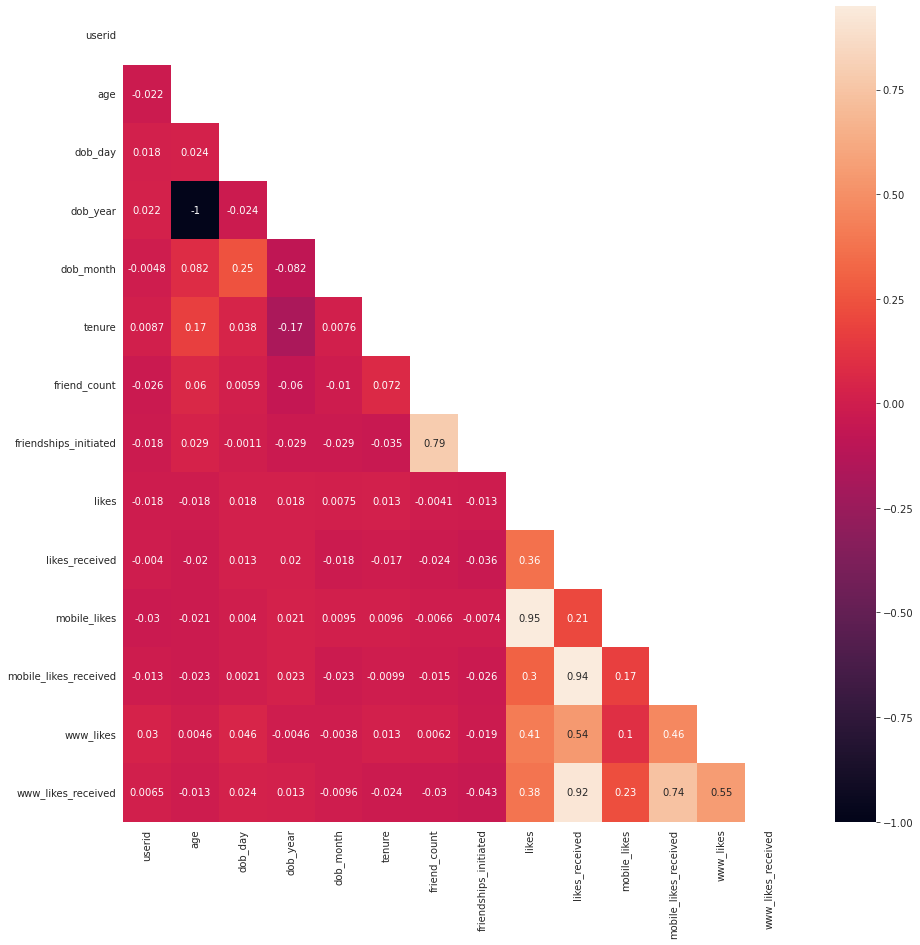

In [6]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(), annot=True, mask=mask)

In [8]:
df = pd.get_dummies(data = df, drop_first=True)
df.drop(['dob_day', 'dob_month', 'dob_year'], axis=1, inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)
df.head()

,userid,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
0,1098638,13,0,0,0,1,0,0,0,1,0,1
1,2063204,14,104,0,0,1,0,0,0,1,0,1
2,1579594,19,212,0,0,1,0,0,0,1,0,0
3,1979672,21,328,0,0,1,0,0,0,1,0,1
4,1344831,23,580,0,0,1,0,0,0,1,0,1


In [10]:
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df.shape

(1178, 12)

In [11]:
df.iloc[:, 0:10] = df.iloc[:, 0:10].apply(lambda rec: np.sqrt(rec))

In [12]:
df.iloc[:, 0:10] = df.iloc[:, 0:10].apply(lambda rec: (rec - rec.mean()) / rec.std())

In [13]:
df.head()


,userid,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
0,-1.473707,-1.727819,-1.831914,-1.920021,-1.473525,-0.851678,-0.747556,-1.19718,-0.593451,0.663015,0,1
1,1.314909,-1.602661,-0.441383,-1.920021,-1.473525,-0.851678,-0.747556,-1.19718,-0.593451,0.663015,0,1
2,0.025087,-1.035069,0.153412,-1.920021,-1.473525,-0.851678,-0.747556,-1.19718,-0.593451,0.663015,0,0
3,1.103891,-0.829385,0.637540,-1.920021,-1.473525,-0.851678,-0.747556,-1.19718,-0.593451,0.663015,0,1
4,-0.672741,-0.633283,1.451896,-1.920021,-1.473525,-0.851678,-0.747556,-1.19718,-0.593451,0.663015,0,1


In [17]:
df_independant = df.drop(columns="likes" , axis = 1)
df_independant.head()

,userid,age,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
0,-1.473707,-1.727819,-1.831914,-1.920021,-1.473525,-0.747556,-1.19718,-0.593451,0.663015,0,1
1,1.314909,-1.602661,-0.441383,-1.920021,-1.473525,-0.747556,-1.19718,-0.593451,0.663015,0,1
2,0.025087,-1.035069,0.153412,-1.920021,-1.473525,-0.747556,-1.19718,-0.593451,0.663015,0,0
3,1.103891,-0.829385,0.637540,-1.920021,-1.473525,-0.747556,-1.19718,-0.593451,0.663015,0,1
4,-0.672741,-0.633283,1.451896,-1.920021,-1.473525,-0.747556,-1.19718,-0.593451,0.663015,0,1


In [18]:
X_train_fm, X_test_fm, y_train_fm, y_test_fm = train_test_split(df_independant, df.likes, random_state=1, \
                                                                                   test_size = 0.3)

In [19]:
MLR_full_model = sm.OLS(y_train_fm, X_train_fm).fit()
print(MLR_full_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  likes   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              1078.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):                        0.00
Time:                        02:09:42   Log-Likelihood:                         -13.099
No. Observations:                 824   AIC:                                      48.20
Df Residuals:                     813   BIC:                                      100.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [20]:
y_train_prediction_fm = MLR_full_model.predict(X_train_fm)
y_train_prediction_fm.head()

554     0.107717
96     -0.364125
2079   -0.731359
1407   -0.714241
141     0.089897
dtype: float64

In [21]:
print('ssr', ssr_fm := np.sum((y_train_prediction_fm -y_train_fm.mean())**2))
print('sse', sse_fm := np.sum((y_train_fm - y_train_prediction_fm)**2))
print('sst', sst_fm := np.sum((y_train_fm - y_train_fm.mean())**2))
print('sst:  sse + ssr: ', sst_fm := sse_fm + ssr_fm)
print('r squared', r_sq_fm := MLR_full_model.rsquared)
print('rsquared: ssr/sst:  ', r_sq_fm := ssr_fm/sst_fm)
print('see', see := np.sqrt(sse_fm/(len(X_train_fm) - 2)))

ssr 726.0717772122272
sse 49.80365018857218
sst 775.7114008141255
sst:  sse + ssr:  775.8754274007994
r squared 0.9358200172400647
rsquared: ssr/sst:   0.9358097338442389
see 0.24614707437737374


In [22]:
#Feature Selection using RFE

In [23]:
rfe_model = RFE(estimator= LinearRegression(), n_features_to_select = 5)
rfe_model = rfe_model.fit(df_independant, df.likes)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_fm.columns)
print(feat_index.sort_values())

mobile_likes             1
mobile_likes_received    1
www_likes                1
www_likes_received       1
gender_male              1
likes_received           2
userid                   3
tenure                   4
friendships_initiated    5
friend_count             6
age                      7
dtype: int32


In [24]:
df_rfe_ind = df_independant[['likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes', 'gender_male']]

In [25]:
y = df.likes
df_rfe_ind = sm.add_constant(df_rfe_ind)
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(df_independant, df.likes, random_state=1, test_size=0.3)

In [26]:
MLR_full_model_rfe = sm.OLS(y_train_rfe, X_train_rfe).fit()
print(MLR_full_model_rfe.summary())

                                 OLS Regression Results                                
Dep. Variable:                  likes   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              1078.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):                        0.00
Time:                        02:10:41   Log-Likelihood:                         -13.099
No. Observations:                 824   AIC:                                      48.20
Df Residuals:                     813   BIC:                                      100.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [27]:
y_train_prediction = MLR_full_model.predict(X_train_rfe)
y_train_prediction.head()

554     0.107717
96     -0.364125
2079   -0.731359
1407   -0.714241
141     0.089897
dtype: float64

In [28]:
#Linear Regression Assumptions Validation

In [34]:
q=[]
s= df_independant
for i in range(s.shape[1]):
    q.append(variance_inflation_factor(s.values,i))

In [35]:
dict(zip(s.columns,q))

{'userid': 1.006755340319023,
 'age': 1.0197516233028674,
 'tenure': 1.127232102469011,
 'friend_count': 2.4143838850913837,
 'friendships_initiated': 2.3047444465222857,
 'likes_received': 20.03039275586412,
 'mobile_likes': 1.4708581285027142,
 'mobile_likes_received': 14.733105839976414,
 'www_likes': 1.4999833046182,
 'www_likes_received': 5.963965482047645,
 'gender_male': 1.5967670501047717}

In [36]:
df_ind_vif = df_independant.drop(['likes_received', 'mobile_likes_received', 'mobile_likes_received'], axis=1)

In [37]:
X_train_vif,X_test_vif,y_train_vif,y_test__vif=train_test_split(df_ind_vif, df.likes,random_state=1,test_size=0.3)

In [38]:
MLR_full_model_vif = sm.OLS(y_train_vif, X_train_vif).fit()
print(MLR_full_model_vif.summary())

                                 OLS Regression Results                                
Dep. Variable:                  likes   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              1318.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):                        0.00
Time:                        02:12:08   Log-Likelihood:                         -13.838
No. Observations:                 824   AIC:                                      45.68
Df Residuals:                     815   BIC:                                      88.10
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [39]:
y_train_prediction_vif = MLR_full_model_vif.predict(X_train_vif)
y_train_prediction_vif.head()

554     0.086908
96     -0.367911
2079   -0.727607
1407   -0.722827
141     0.097085
dtype: float64

In [40]:
print('ssr', ssr_vif := np.sum((y_train_prediction -y_train_vif.mean())**2))
print('sse', sse_vif := np.sum((y_train_vif - y_train_prediction)**2))
print('sst', sst_vif := np.sum((y_train_vif - y_train_vif.mean())**2))
print('sst:  sse + ssr: ', sst_vif := sse_vif + ssr_vif)
print('r squared', r_sq_vif := MLR_full_model_vif.rsquared)
print('rsquared: ssr/sst:  ', r_sq_vif := ssr_vif/sst_vif)
print('see', see_vif := np.sqrt(sse_vif/(len(X_train_vif) - 2)))

ssr 726.0717772122272
sse 49.80365018857218
sst 775.7114008141255
sst:  sse + ssr:  775.8754274007994
r squared 0.9357048303163474
rsquared: ssr/sst:   0.9358097338442389
see 0.24614707437737374


In [41]:
residual=(y_train_vif-y_train_prediction_vif)

<AxesSubplot:>

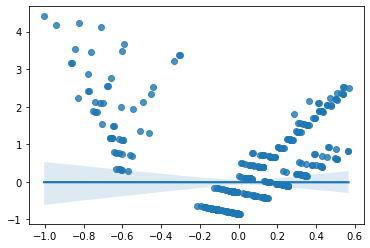

In [42]:
sns.regplot(x=residual,y=y_train_prediction_vif)

In [43]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residual)

2.0694822435310196

ShapiroResult(statistic=0.8974657654762268, pvalue=5.1182971071301935e-23)


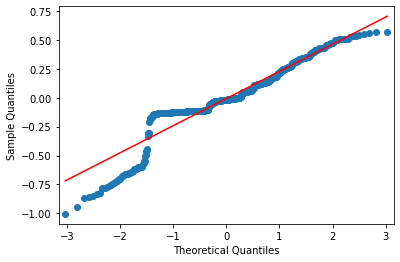

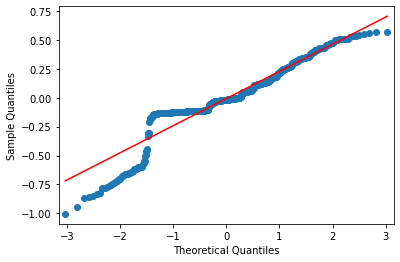

In [44]:
from scipy.stats import shapiro
print(shapiro(residual))
#since p value is less than alpha we fail to reject H0-> the residuals are normally distributed
qqplot(residual,line='r')
#here the points are fairly away from the trend line this shows the residuals are normally distributed

In [45]:
#cross_val_score

In [46]:
from sklearn.model_selection import cross_val_score

cross_score= cross_val_score(estimator=LinearRegression(),X=X_train_rfe,y=y_train_rfe,cv=5,scoring='r2')
cross_score

array([0.94539809, 0.93914413, 0.91758999, 0.94860325, 0.91289684])

In [47]:
cross_score.mean()

0.9327264619961516